<a href="https://colab.research.google.com/github/nayana142/Deep_Learning_ANN_Models/blob/main/Copy_of_Rain_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RAIN PREDICTION**




**IMPORT LIBRARIES**

In [ ]:
import numpy as np
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense,BatchNormalization,Dropout,LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import  Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score, f1_score
from keras import callbacks
np.random.seed(0)

Loading **Data**

In [ ]:
data=pd.read_csv('weatherAUS.csv')
data

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0      2008-12-01        Albury     13.4     22.9       0.6          NaN   
1      2008-12-02        Albury      7.4     25.1       0.0          NaN   
2      2008-12-03        Albury     12.9     25.7       0.0          NaN   
3      2008-12-04        Albury      9.2     28.0       0.0          NaN   
4      2008-12-05        Albury     17.5     32.3       1.0          NaN   
...           ...           ...      ...      ...       ...          ...   
10806  2014-01-12  CoffsHarbour     17.5     27.2       0.0          6.8   
10807  2014-01-13  CoffsHarbour     17.3     27.3       0.0          7.8   
10808  2014-01-14  CoffsHarbour     18.3     27.1       0.0          3.8   
10809  2014-01-15  CoffsHarbour     17.8     28.1       0.0          7.4   
10810  2014-01-16  CoffsHarbour     19.2     28.0       0.0          6.4   

       Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0           NaN           W           44.0          W  ...        71.0   
1           NaN         WNW           44.0        NNW  ...        44.0   
2           NaN         WSW           46.0          W  ...        38.0   
3           NaN          NE           24.0         SE  ...        45.0   
4           NaN           W           41.0        ENE  ...        82.0   
...         ...         ...            ...        ...  ...         ...   
10806       NaN         ENE           30.0        SSE  ...        61.0   
10807       NaN         SSE           35.0        WSW  ...        75.0   
10808      12.2          SW           24.0        SSW  ...        67.0   
10809      12.6         ENE           33.0         SW  ...        66.0   
10810       NaN          NE           41.0          E  ...         NaN   

       Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0             22.0       1007.7       1007.1       8.0       NaN     16.9   
1             25.0       1010.6       1007.8       NaN       NaN     17.2   
2             30.0       1007.6       1008.7       NaN       2.0     21.0   
3             16.0       1017.6       1012.8       NaN       NaN     18.1   
4             33.0       1010.8       1006.0       7.0       8.0     17.8   
...            ...          ...          ...       ...       ...      ...   
10806         62.0       1017.1       1016.4       0.0       1.0     25.5   
10807         64.0       1020.2       1018.9       7.0       5.0     22.5   
10808         55.0       1021.7       1020.8       6.0       1.0     24.8   
10809         62.0       1023.2       1021.6       7.0       2.0     24.6   
10810          NaN          NaN          NaN       NaN       NaN      NaN   

       Temp3pm  RainToday  RainTomorrow  
0         21.8         No            No  
1         24.3         No            No  
2         23.2         No            No  
3         26.5         No            No  
4         29.7         No            No  
...        ...        ...           ...  
10806     26.5         No            No  
10807     25.8         No            No  
10808     25.9         No            No  
10809     26.7         No            No  
10810      NaN        NaN           NaN  

[10811 rows x 23 columns]

About the data:

The dataset contains about 10 years of daily weather observations from different locations across Australia. Observations were drawn from numerous weather stations.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10811 entries, 0 to 10810
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           10811 non-null  object 
 1   Location       10811 non-null  object 
 2   MinTemp        10757 non-null  float64
 3   MaxTemp        10766 non-null  float64
 4   Rainfall       10676 non-null  float64
 5   Evaporation    4357 non-null   float64
 6   Sunshine       2005 non-null   float64
 7   WindGustDir    10624 non-null  object 
 8   WindGustSpeed  10624 non-null  float64
 9   WindDir9am     9786 non-null   object 
 10  WindDir3pm     10657 non-null  object 
 11  WindSpeed9am   10730 non-null  float64
 12  WindSpeed3pm   10734 non-null  float64
 13  Humidity9am    10616 non-null  float64
 14  Humidity3pm    10610 non-null  float64
 15  Pressure9am    10599 non-null  float64
 16  Pressure3pm    10595 non-null  float64
 17  Cloud9am       5655 non-null   float64
 18  Cloud3

In [ ]:
data.describe(include='object')

Date Location WindGustDir WindDir9am WindDir3pm RainToday  \
count        10811    10811       10624       9786      10657     10675   
unique        3040        4          16         16         16         2   
top     2013-04-28   Albury          SW         SW        NNE        No   
freq             4     3040        1086       1275        834      8558   

       RainTomorrow  
count         10675  
unique            2  
top              No  
freq           8557

In [ ]:
data.isnull().sum()

Date                0
Location            0
MinTemp            54
MaxTemp            45
Rainfall          135
Evaporation      6454
Sunshine         8806
WindGustDir       187
WindGustSpeed     187
WindDir9am       1025
WindDir3pm        154
WindSpeed9am       81
WindSpeed3pm       77
Humidity9am       195
Humidity3pm       201
Pressure9am       212
Pressure3pm       216
Cloud9am         5156
Cloud3pm         4954
Temp9am            61
Temp3pm            64
RainToday         136
RainTomorrow      136
dtype: int64

There are missing values in the data

first of all let us evaluate the target and find out if our data is imbalanced or not

<Axes: xlabel='RainTomorrow', ylabel='count'>

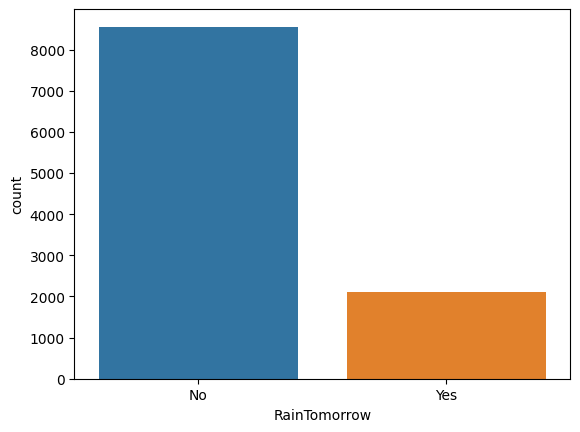

In [ ]:
sns.countplot(x=data['RainTomorrow'])

<ipython-input-26-b8947f1dc649>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


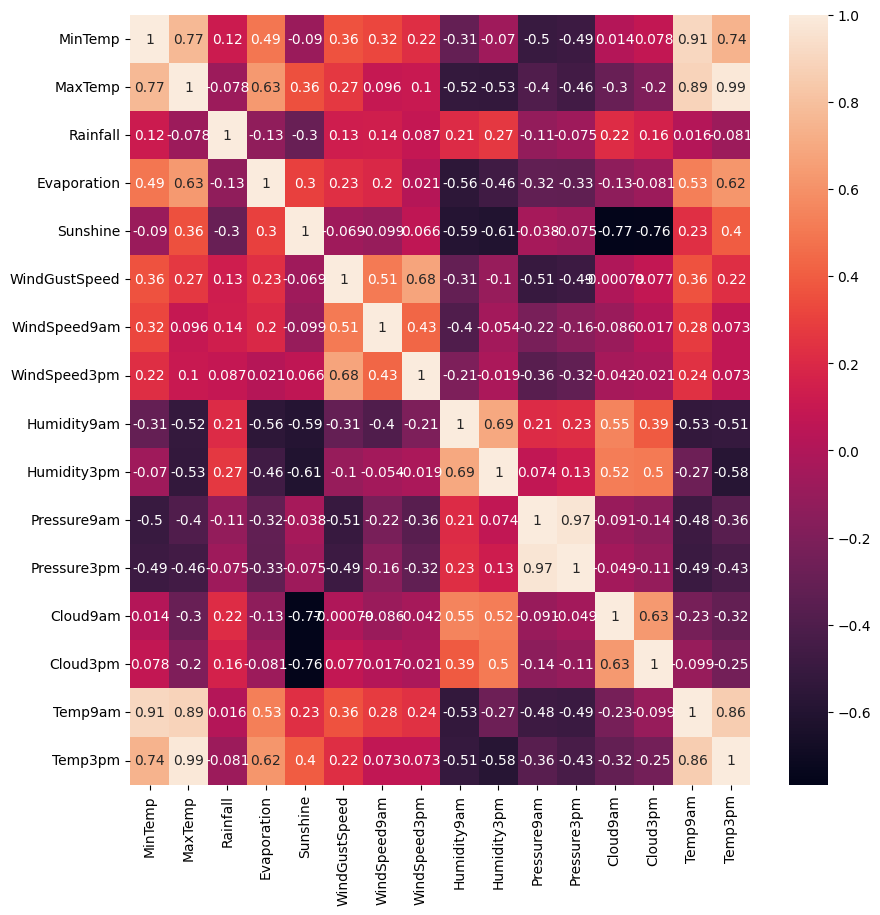

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

<Figure size 1000x1000 with 0 Axes>

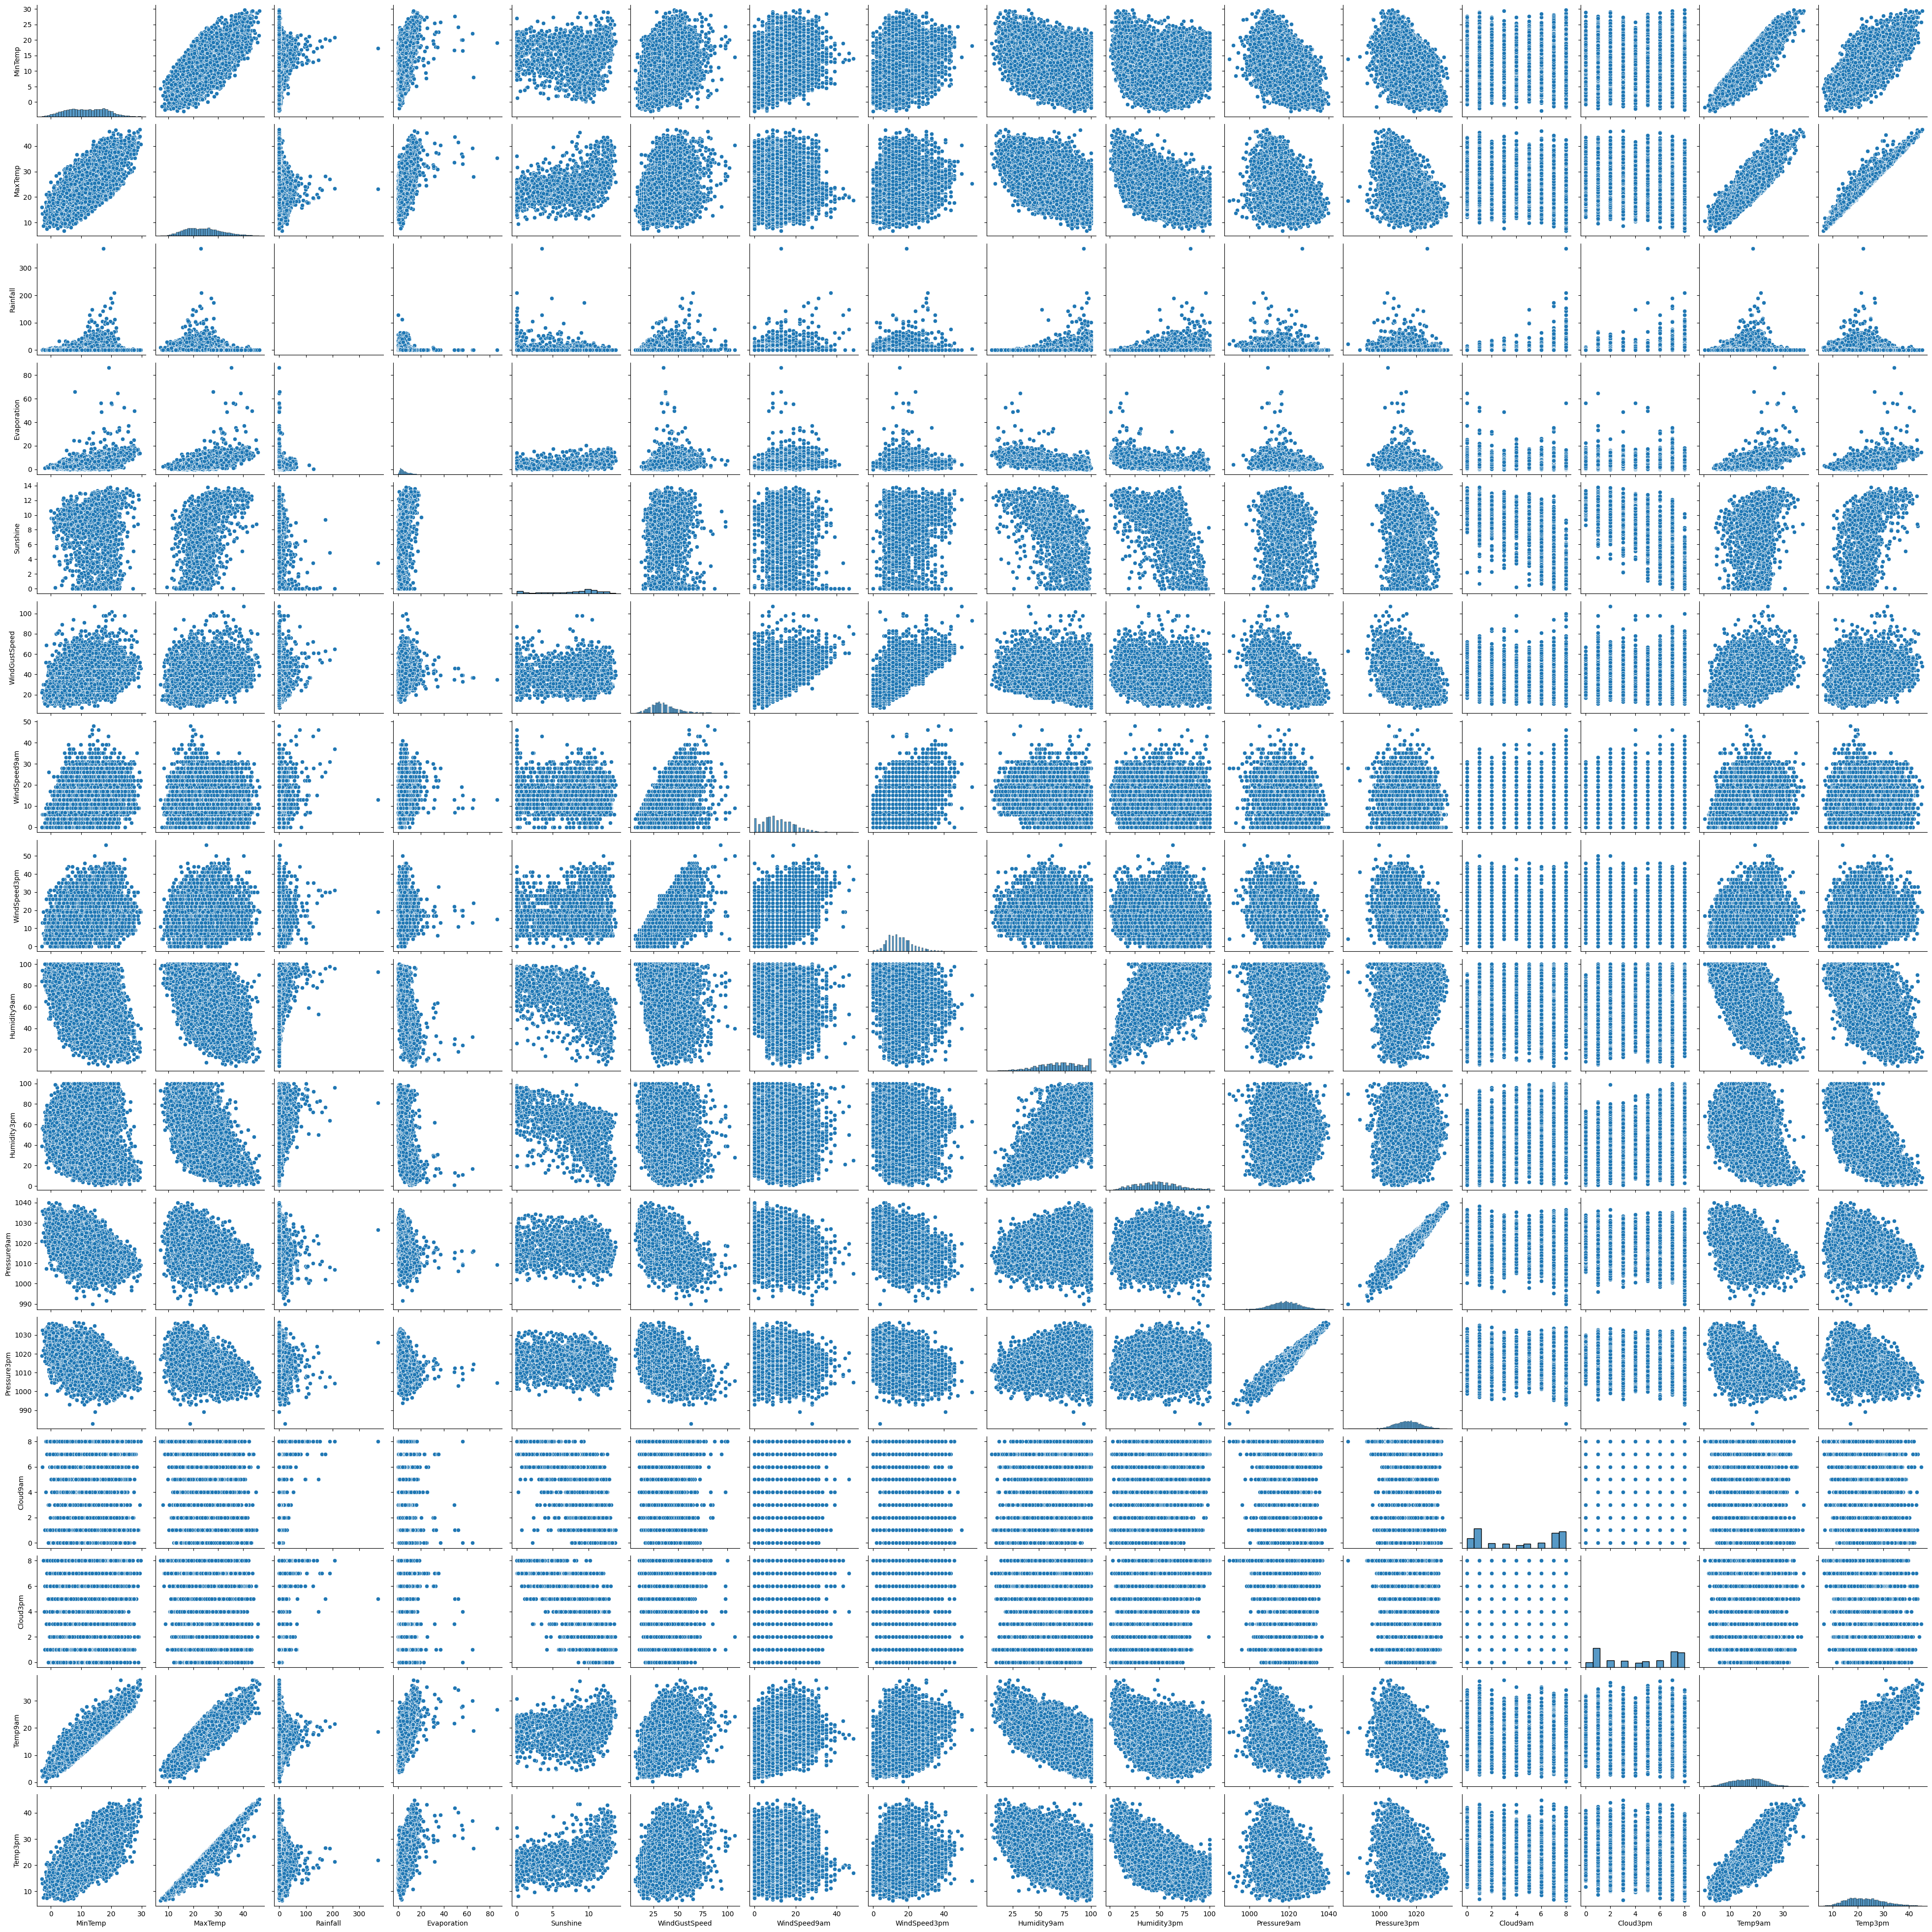

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(data)

In [ ]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:

for i in data.columns:
  print(i,':',data[i].nunique())


Date : 3040
Location : 4
MinTemp : 315
MaxTemp : 370
Rainfall : 284
Evaporation : 151
Sunshine : 138
WindGustDir : 16
WindGustSpeed : 52
WindDir9am : 16
WindDir3pm : 16
WindSpeed9am : 27
WindSpeed3pm : 29
Humidity9am : 96
Humidity3pm : 100
Pressure9am : 398
Pressure3pm : 393
Cloud9am : 9
Cloud3pm : 9
Temp9am : 335
Temp3pm : 366
RainToday : 2
RainTomorrow : 2


<Axes: ylabel='RainToday'>

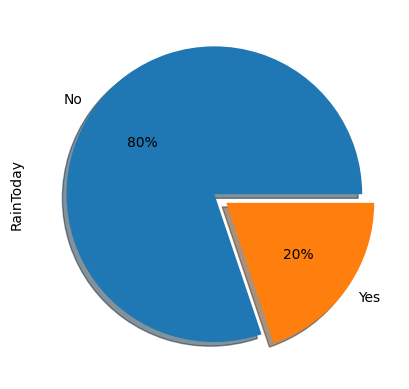

In [ ]:
data['RainToday'].value_counts().plot(kind='pie',shadow=True,autopct='%.0f%%',explode=(0,0.1))


In [ ]:
data['Date']=pd.to_datetime(data['Date'])
data['year']=data.Date.dt.year
data['month']=data.Date.dt.month
data['day']=data.Date.dt.day
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1 2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2 2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3 2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4 2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Pressure3pm  Cloud9am  Cloud3pm  \
0           W           44.0          W  ...      1007.1       8.0       NaN   
1         WNW           44.0        NNW  ...      1007.8       NaN       NaN   
2         WSW           46.0          W  ...      1008.7       NaN       2.0   
3          NE           24.0         SE  ...      1012.8       NaN       NaN   
4           W           41.0        ENE  ...      1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  year  month  day  
0     16.9     21.8         No            No  2008     12    1  
1     17.2     24.3         No            No  2008     12    2  
2     21.0     23.2         No            No  2008     12    3  
3     18.1     26.5         No            No  2008     12    4  
4     17.8     29.7         No            No  2008     12    5  

[5 rows x 26 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10811 entries, 0 to 10810
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           10811 non-null  datetime64[ns]
 1   Location       10811 non-null  object        
 2   MinTemp        10757 non-null  float64       
 3   MaxTemp        10766 non-null  float64       
 4   Rainfall       10676 non-null  float64       
 5   Evaporation    4357 non-null   float64       
 6   Sunshine       2005 non-null   float64       
 7   WindGustDir    10624 non-null  object        
 8   WindGustSpeed  10624 non-null  float64       
 9   WindDir9am     9786 non-null   object        
 10  WindDir3pm     10657 non-null  object        
 11  WindSpeed9am   10730 non-null  float64       
 12  WindSpeed3pm   10734 non-null  float64       
 13  Humidity9am    10616 non-null  float64       
 14  Humidity3pm    10610 non-null  float64       
 15  Pressure9am    1059

Handling missing values

Categorical Variables

In [ ]:
cat=data.dtypes=="object"
cat
cat_col=list(cat[cat].index)
cat_col

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
for i in cat_col:
  data[i].fillna(data[i].mode(),inplace=True)


Numerical_columns

In [ ]:
num=data.dtypes!='object'
num_col=list(num[num].index)
num_col

['Date',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'year',
 'month',
 'day']

In [ ]:
for i in num_col:
  data[i].fillna(data[i].median(),inplace=True)

[]

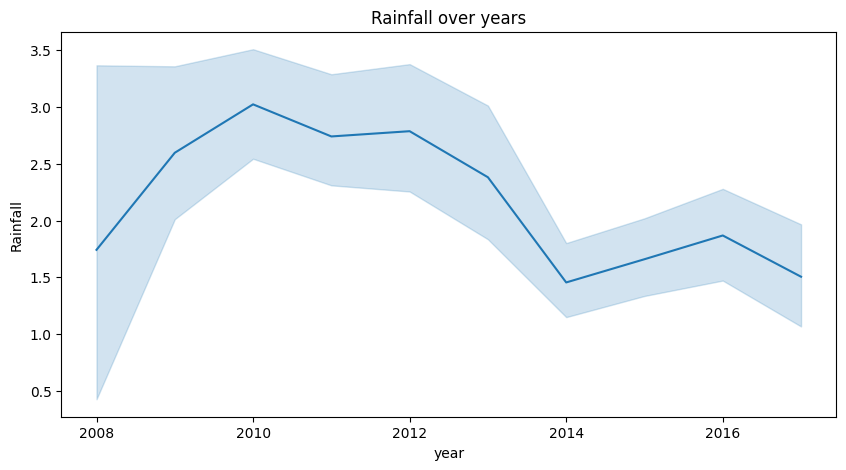

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data,x='year',y='Rainfall')
plt.title('Rainfall over years')
plt.plot()

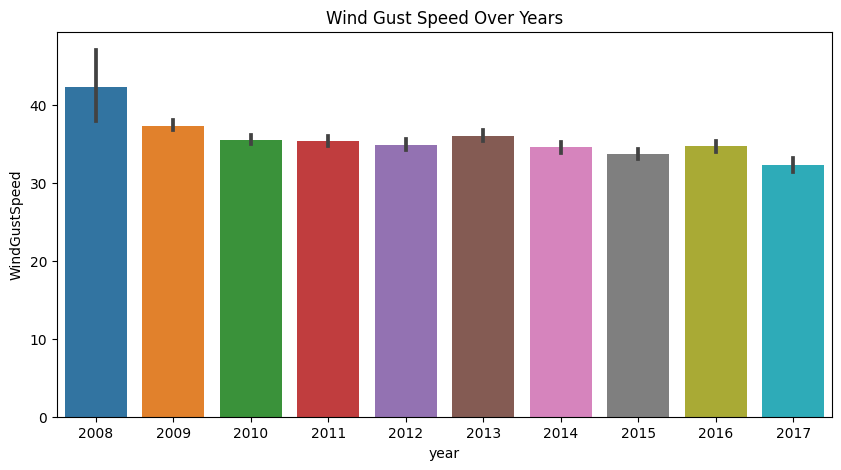

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='year',y='WindGustSpeed',data=data)
plt.title('Wind Gust Speed Over Years')
plt.show()

[]

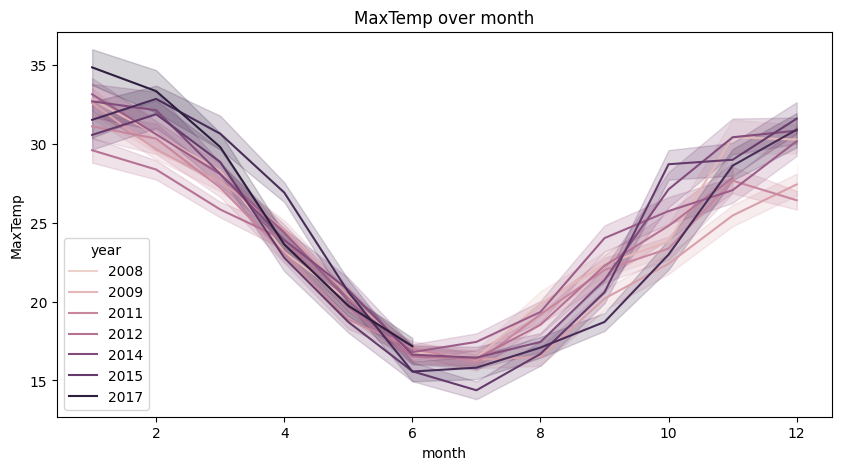

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data,x='month',y='MaxTemp',hue='year')
plt.title('MaxTemp over month')
plt.plot()

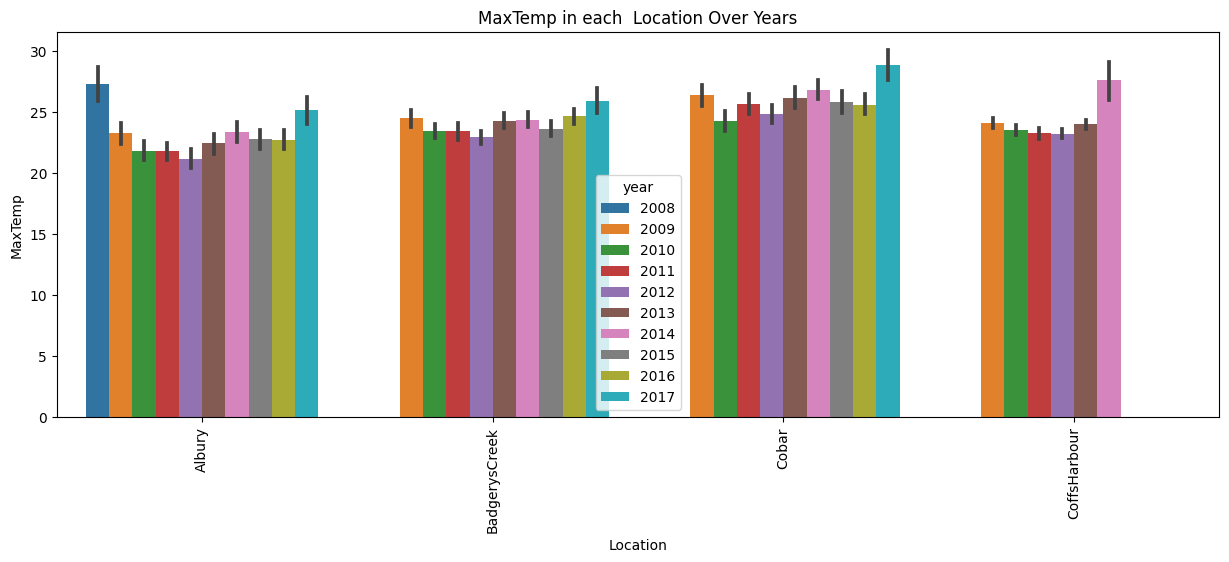

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='Location',y='MaxTemp',data=data,hue='year')
plt.title('MaxTemp in each  Location Over Years')
plt.xticks(rotation=90)
plt.show()

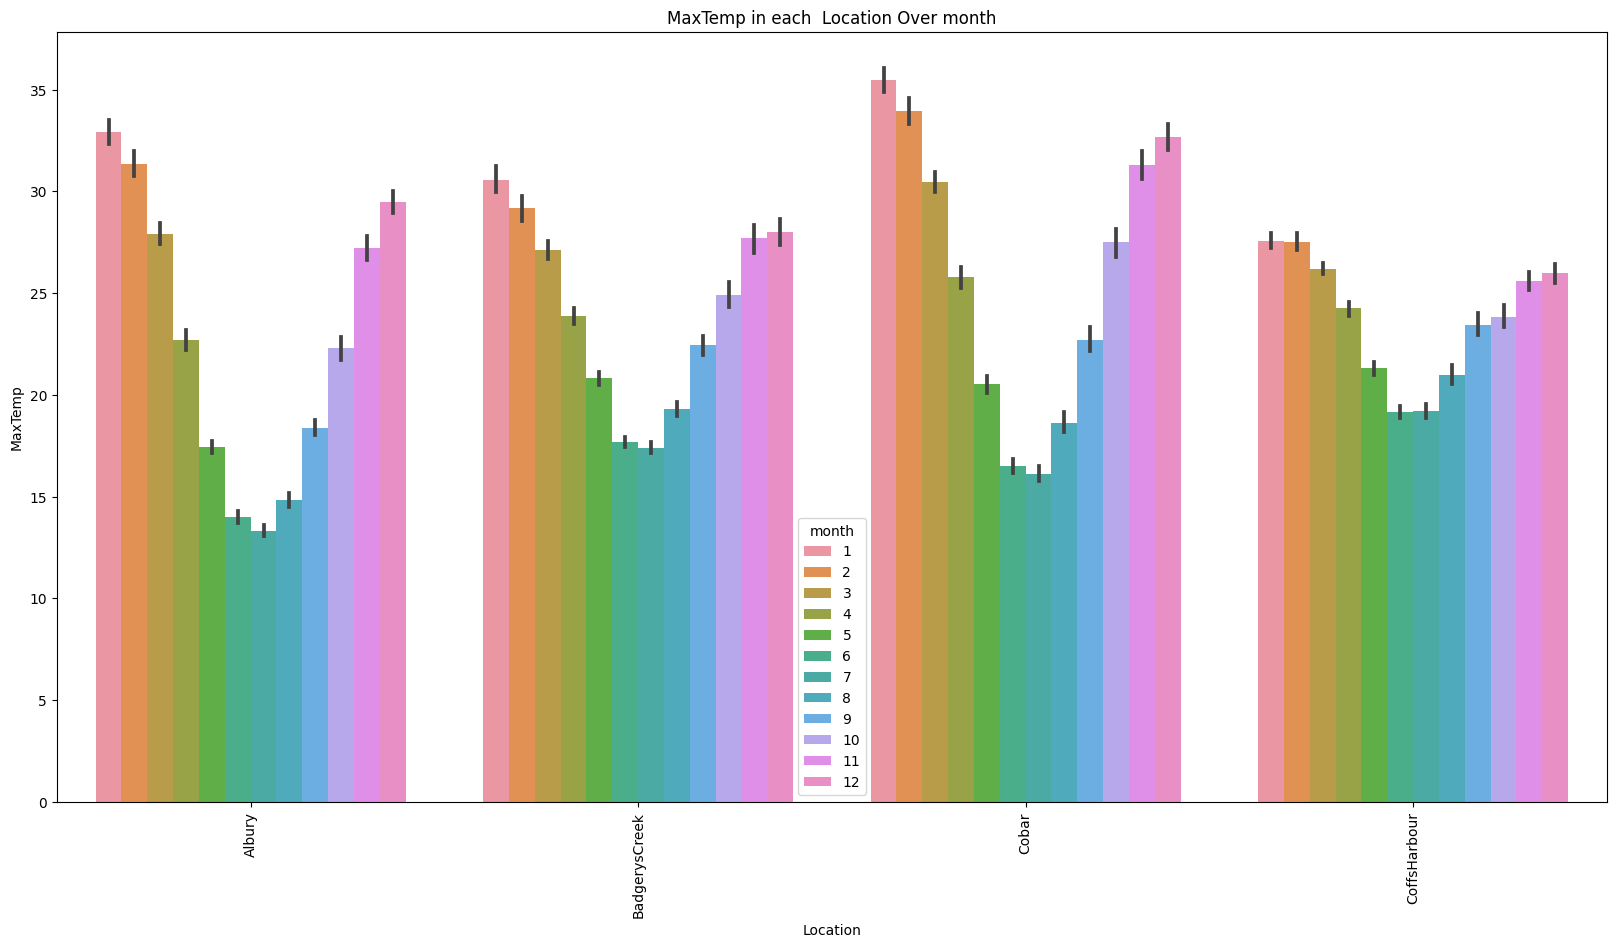

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Location',y='MaxTemp',data=data,hue='month')
plt.title('MaxTemp in each  Location Over month')
plt.xticks(rotation=90)
plt.show()

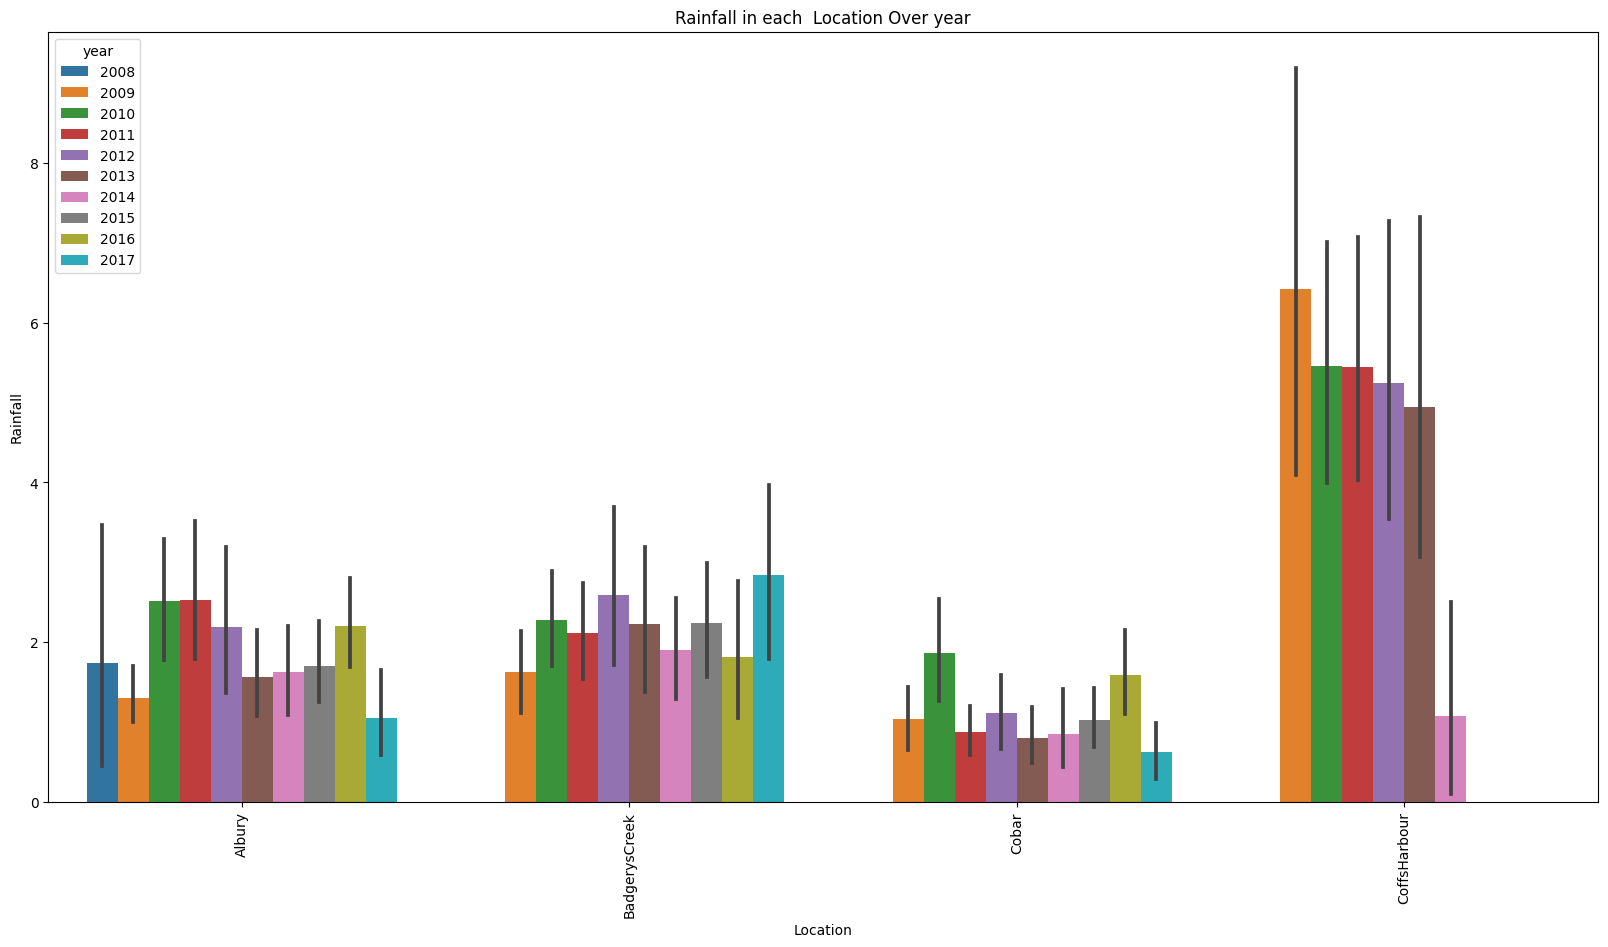

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='Location',y='Rainfall',data=data,hue='year')
plt.title('Rainfall in each  Location Over year')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'year', 'month', 'day'],
      dtype='object')

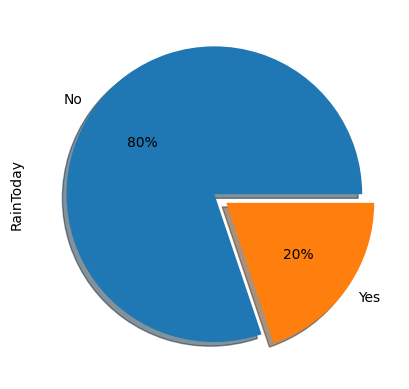

In [ ]:
data['RainToday'].value_counts().plot(kind='pie',shadow=True,explode=(0,0.1),autopct='%.0f%%')
plt.show()

Label encoding the catagorical varable

In [ ]:
LB=LabelEncoder()
for i in cat_col:
  data[i]=LB.fit_transform(data[i])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10811 entries, 0 to 10810
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           10811 non-null  datetime64[ns]
 1   Location       10811 non-null  int64         
 2   MinTemp        10811 non-null  float64       
 3   MaxTemp        10811 non-null  float64       
 4   Rainfall       10811 non-null  float64       
 5   Evaporation    10811 non-null  float64       
 6   Sunshine       10811 non-null  float64       
 7   WindGustDir    10811 non-null  int64         
 8   WindGustSpeed  10811 non-null  float64       
 9   WindDir9am     10811 non-null  int64         
 10  WindDir3pm     10811 non-null  int64         
 11  WindSpeed9am   10811 non-null  float64       
 12  WindSpeed3pm   10811 non-null  float64       
 13  Humidity9am    10811 non-null  float64       
 14  Humidity3pm    10811 non-null  float64       
 15  Pressure9am    1081

Spliting train and test data

In [ ]:
df=data.drop(['year','month','day','Date'],axis=1)

In [ ]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         0     13.4     22.9       0.6          4.4       8.9           13   
1         0      7.4     25.1       0.0          4.4       8.9           14   
2         0     12.9     25.7       0.0          4.4       8.9           15   
3         0      9.2     28.0       0.0          4.4       8.9            4   
4         0     17.5     32.3       1.0          4.4       8.9           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  Humidity3pm  \
0           44.0          13          14  ...         71.0         22.0   
1           44.0           6          15  ...         44.0         25.0   
2           46.0          13          15  ...         38.0         30.0   
3           24.0           9           0  ...         45.0         16.0   
4           41.0           1           7  ...         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       5.0     16.9     21.8          0   
1       1010.6       1007.8       5.0       5.0     17.2     24.3          0   
2       1007.6       1008.7       5.0       2.0     21.0     23.2          0   
3       1017.6       1012.8       5.0       5.0     18.1     26.5          0   
4       1010.8       1006.0       7.0       8.0     17.8     29.7          0   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 22 columns]

In [ ]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Detecting outlier

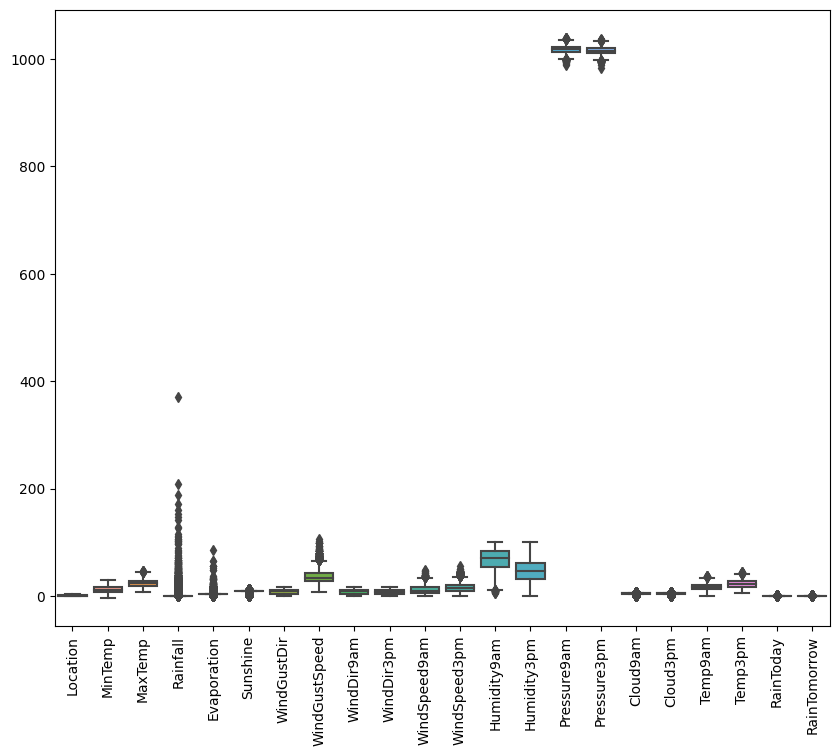

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0             0     13.4     22.9       0.6          4.4       8.9   
1             0      7.4     25.1       0.0          4.4       8.9   
2             0     12.9     25.7       0.0          4.4       8.9   
3             0      9.2     28.0       0.0          4.4       8.9   
4             0     17.5     32.3       1.0          4.4       8.9   
...         ...      ...      ...       ...          ...       ...   
10806         3     17.5     27.2       0.0          6.8       8.9   
10807         3     17.3     27.3       0.0          7.8       8.9   
10808         3     18.3     27.1       0.0          3.8      12.2   
10809         3     17.8     28.1       0.0          7.4      12.6   
10810         3     19.2     28.0       0.0          6.4       8.9   

       WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  \
0               13           44.0          13          14  ...         71.0   
1               14           44.0           6          15  ...         44.0   
2               15           46.0          13          15  ...         38.0   
3                4           24.0           9           0  ...         45.0   
4               13           41.0           1           7  ...         82.0   
...            ...            ...         ...         ...  ...          ...   
10806            1           30.0          10           4  ...         61.0   
10807           10           35.0          15          10  ...         75.0   
10808           12           24.0          11           2  ...         67.0   
10809            1           33.0          12           1  ...         66.0   
10810            4           41.0           0           4  ...         70.0   

       Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0             22.0       1007.7       1007.1       8.0       5.0     16.9   
1             25.0       1010.6       1007.8       5.0       5.0     17.2   
2             30.0       1007.6       1008.7       5.0       2.0     21.0   
3             16.0       1017.6       1012.8       5.0       5.0     18.1   
4             33.0       1010.8       1006.0       7.0       8.0     17.8   
...            ...          ...          ...       ...       ...      ...   
10806         62.0       1017.1       1016.4       0.0       1.0     25.5   
10807         64.0       1020.2       1018.9       7.0       5.0     22.5   
10808         55.0       1021.7       1020.8       6.0       1.0     24.8   
10809         62.0       1023.2       1021.6       7.0       2.0     24.6   
10810         46.0       1018.2       1015.5       5.0       5.0     17.2   

       Temp3pm  RainToday  RainTomorrow  
0         21.8          0             0  
1         24.3          0             0  
2         23.2          0             0  
3         26.5          0             0  
4         29.7          0             0  
...        ...        ...           ...  
10806     26.5          0             0  
10807     25.8          0             0  
10808     25.9          0             0  
10809     26.7          0             0  
10810     22.1          2             2  

[10811 rows x 22 columns]

In [ ]:
x=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8648, 21)
(2163, 21)
(8648,)
(2163,)


In [ ]:
x_train.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
7630          2     10.6     22.7       0.0          4.0       8.9   
10759         3     15.6     23.6       7.4          6.6      12.2   
6878          2      2.3     18.0       0.0          3.6       8.9   
635           0      0.9     14.4       0.0          4.4       8.9   
8703          2      7.2     10.9       2.9          4.4       8.9   

       WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  WindSpeed3pm  \
7630             5           35.0           5           7  ...          15.0   
10759            8           57.0          11           8  ...          37.0   
6878            15           31.0          11          11  ...          11.0   
635             15           22.0           1          13  ...           4.0   
8703            13           39.0          13          13  ...          24.0   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
7630          62.0         41.0       1022.8       1019.3       6.0       7.0   
10759         53.0         53.0       1013.9       1013.8       1.0       4.0   
6878          65.0         27.0       1018.6       1016.4       0.0       1.0   
635           99.0         58.0       1024.4       1024.0       8.0       3.0   
8703          87.0         83.0       1017.6       1017.2       7.0       8.0   

       Temp9am  Temp3pm  RainToday  
7630      13.8     20.9          0  
10759     20.4     23.0          1  
6878       8.5     17.4          0  
635        4.1     13.3          0  
8703       7.6      9.6          1  

[5 rows x 21 columns]

Standardising dataset

In [ ]:
scaler = StandardScaler()


In [ ]:
col_names=list(x_train.columns)
xtrain_sc=scaler.fit_transform(x_train)
xtrain_sc=pd.DataFrame(xtrain_sc,columns=col_names)
x_test_sc=scaler.transform(x_test)
xtest_sc=pd.DataFrame(x_test_sc,columns=col_names)

In [ ]:
xtrain_sc.head()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0  0.647309 -0.177751 -0.198653 -0.261187    -0.285924  0.124697    -0.645153   
1  1.597076  0.621256 -0.069915  0.611435     0.545515  2.091666    -0.032539   
2  0.647309 -1.504103 -0.870953 -0.261187    -0.413837  0.124697     1.396894   
3 -1.252225 -1.727825 -1.385906 -0.261187    -0.158010  0.124697     1.396894   
4  0.647309 -0.721076 -1.886555  0.080786    -0.158010  0.124697     0.988485   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  WindSpeed3pm  Humidity9am  \
0      -0.012622   -0.711954   -0.158798  ...     -0.077800    -0.331880   
1       1.751784    0.494784    0.052444  ...      2.778044    -0.781794   
2      -0.333423    0.494784    0.686171  ...     -0.597044    -0.181909   
3      -1.055225   -1.516447    1.108656  ...     -1.505721     1.517765   
4       0.308179    0.897030    1.108656  ...      1.090500     0.917880   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
0    -0.301413     0.672393     0.556197  0.629637  1.114887 -0.507182   
1     0.275720    -0.649867    -0.272006 -1.588868 -0.295933  0.569492   
2    -0.974736     0.048405     0.119508 -2.032569 -1.706752 -1.371784   
3     0.516192     0.910103     1.263935  1.517039 -0.766206 -2.089566   
4     1.718554    -0.100164     0.239974  1.073338  1.585160 -1.518603   

    Temp3pm  RainToday  
0 -0.264008  -0.496375  
1  0.046330   1.766489  
2 -0.781238  -0.496375  
3 -1.387135  -0.496375  
4 -1.933921   1.766489  

[5 rows x 21 columns]

In [ ]:
print(xtrain_sc.shape)
print(x_test_sc.shape)
print(y_train.shape)
print(y_test.shape)

(8648, 21)
(2163, 21)
(8648,)
(2163,)


Outlier Detection

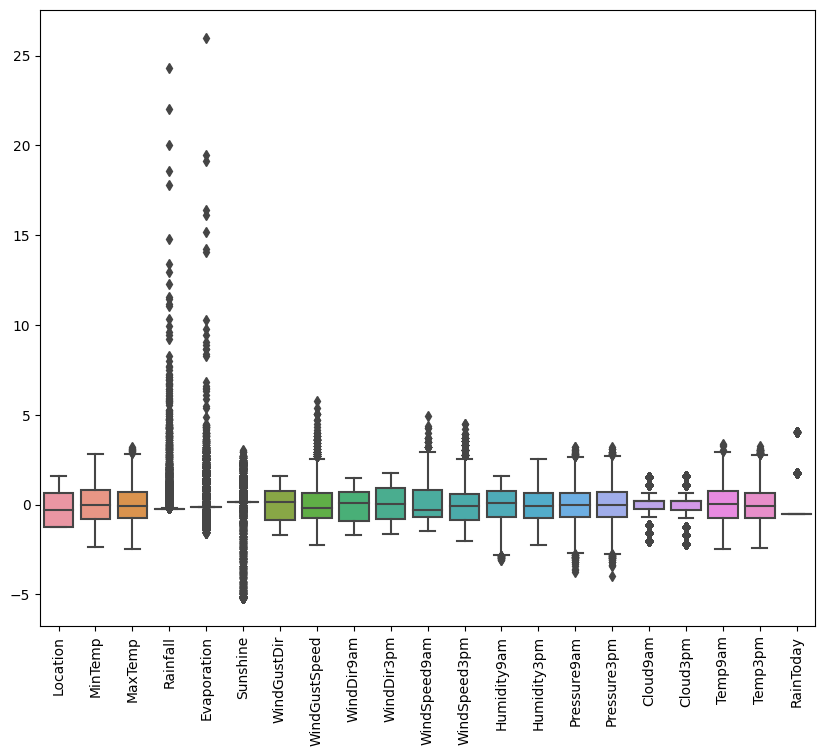

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=xtrain_sc)
plt.xticks(rotation=90)
plt.show()

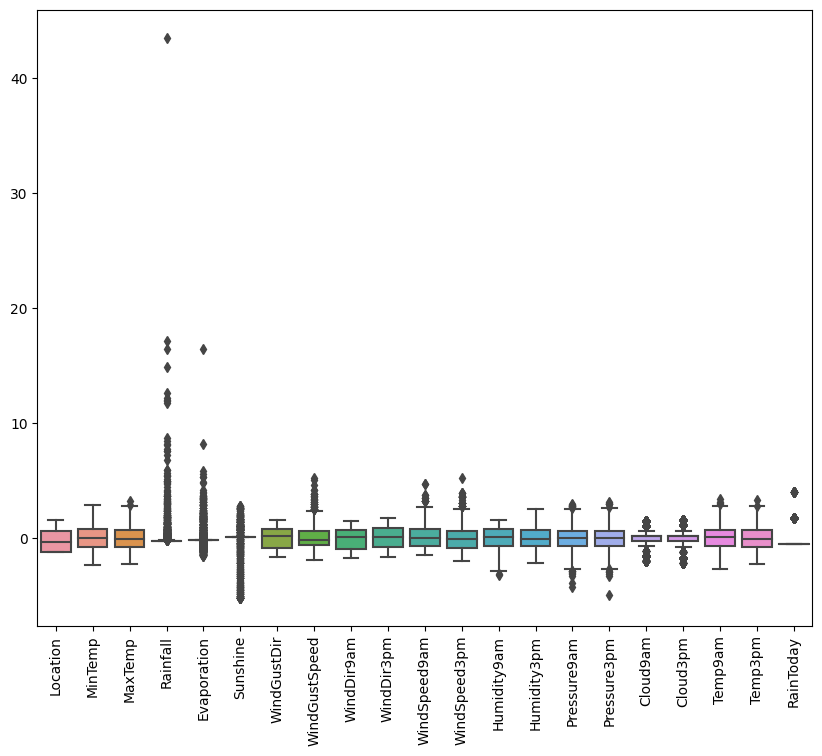

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=xtest_sc)
plt.xticks(rotation=90)
plt.show()

Droping Outliers

In [ ]:
xtrain_sc.describe()

Location       MinTemp       MaxTemp      Rainfall   Evaporation  \
count  8.648000e+03  8.648000e+03  8.648000e+03  8.648000e+03  8.648000e+03   
mean   2.464880e-17  4.580569e-16 -4.420351e-16  3.943808e-17 -5.011923e-17   
std    1.000058e+00  1.000058e+00  1.000058e+00  1.000058e+00  1.000058e+00   
min   -1.252225e+00 -2.351050e+00 -2.473029e+00 -2.611871e-01 -1.565060e+00   
25%   -1.252225e+00 -8.009767e-01 -7.708234e-01 -2.611871e-01 -1.580099e-01   
50%   -3.024582e-01 -1.969800e-03 -6.991516e-02 -2.611871e-01 -1.580099e-01   
75%    6.473088e-01  7.970371e-01  6.882101e-01 -2.376028e-01 -1.580099e-01   
max    1.597076e+00  2.826515e+00  3.191454e+00  2.432552e+01  2.600033e+01   

           Sunshine   WindGustDir  WindGustSpeed    WindDir9am    WindDir3pm  \
count  8.648000e+03  8.648000e+03   8.648000e+03  8.648000e+03  8.648000e+03   
mean  -9.222759e-17  1.520009e-17   1.052196e-16  1.070169e-16 -1.232440e-18   
std    1.000058e+00  1.000058e+00   1.000058e+00  1.000058e+00  1.000058e+00   
min   -5.180159e+00 -1.666176e+00  -2.258229e+00 -1.717570e+00 -1.637495e+00   
25%    1.246966e-01 -8.493571e-01  -7.344239e-01 -9.130773e-01 -7.925252e-01   
50%    1.246966e-01  1.716660e-01  -1.730222e-01  9.253801e-02  5.244419e-02   
75%    1.246966e-01  7.842799e-01   6.289802e-01  6.959072e-01  8.974136e-01   
max    3.045347e+00  1.601098e+00   5.761796e+00  1.500399e+00  1.742383e+00   

       ...  WindSpeed3pm   Humidity9am   Humidity3pm   Pressure9am  \
count  ...  8.648000e+03  8.648000e+03  8.648000e+03  8.648000e+03   
mean   ... -4.180026e-17 -1.889741e-17 -4.683272e-17 -1.728425e-14   
std    ...  1.000058e+00  1.000058e+00  1.000058e+00  1.000058e+00   
min    ... -2.024965e+00 -3.081352e+00 -2.225192e+00 -3.769807e+00   
25%    ... -8.566659e-01 -6.818128e-01 -7.342636e-01 -6.795809e-01   
50%    ... -7.779957e-02  6.804313e-02 -6.094115e-02 -1.102239e-02   
75%    ...  5.712557e-01  7.679087e-01  6.604757e-01  6.723930e-01   
max    ...  4.465587e+00  1.567755e+00  2.536160e+00  3.212915e+00   

        Pressure3pm      Cloud9am      Cloud3pm       Temp9am       Temp3pm  \
count  8.648000e+03  8.648000e+03  8.648000e+03  8.648000e+03  8.648000e+03   
mean  -6.253195e-15 -3.871916e-17 -1.478928e-16 -2.748341e-16  3.845213e-16   
std    1.000058e+00  1.000058e+00  1.000058e+00  1.000058e+00  1.000058e+00   
min   -3.991392e+00 -2.032569e+00 -2.177025e+00 -2.497397e+00 -2.406817e+00   
25%   -6.936369e-01 -2.577652e-01 -2.959328e-01 -7.518805e-01 -7.664596e-01   
50%   -1.601592e-02  1.859357e-01  1.743404e-01  4.746836e-02 -8.667203e-02   
75%    6.766633e-01  1.859357e-01  1.743404e-01  7.326245e-01  6.522275e-01   
max    3.191390e+00  1.517039e+00  1.585160e+00  3.391683e+00  3.267932e+00   

          RainToday  
count  8.648000e+03  
mean  -1.478928e-17  
std    1.000058e+00  
min   -4.963753e-01  
25%   -4.963753e-01  
50%   -4.963753e-01  
75%   -4.963753e-01  
max    4.029353e+00  

[8 rows x 21 columns]

In [ ]:
xtrain_sc = xtrain_sc[(xtrain_sc["MinTemp"]<2.3)&(xtrain_sc["MinTemp"]>-2.3)]
xtrain_sc = xtrain_sc[(xtrain_sc["MaxTemp"]<2.3)&(xtrain_sc["MaxTemp"]>-2)]
xtrain_sc = xtrain_sc[(xtrain_sc["Rainfall"]<4.5)]
xtrain_sc = xtrain_sc[(xtrain_sc["Evaporation"]<2.8)]
xtrain_sc = xtrain_sc[(xtrain_sc["Sunshine"]<2.1)]
xtrain_sc = xtrain_sc[(xtrain_sc["WindGustSpeed"]<4)&(xtrain_sc["WindGustSpeed"]>-4)]
xtrain_sc = xtrain_sc[(xtrain_sc["WindSpeed9am"]<4)]
xtrain_sc = xtrain_sc[(xtrain_sc["WindSpeed3pm"]<2.5)]
xtrain_sc = xtrain_sc[(xtrain_sc["Humidity9am"]>-3)]
xtrain_sc = xtrain_sc[(xtrain_sc["Humidity3pm"]>-2.2)]
xtrain_sc = xtrain_sc[(xtrain_sc["Pressure9am"]< 2)&(xtrain_sc["Pressure9am"]>-2.7)]
xtrain_sc = xtrain_sc[(xtrain_sc["Pressure3pm"]< 2)&(xtrain_sc["Pressure3pm"]>-2.7)]
xtrain_sc = xtrain_sc[(xtrain_sc["Cloud9am"]<1.8)]
xtrain_sc = xtrain_sc[(xtrain_sc["Cloud3pm"]<2)]
xtrain_sc = xtrain_sc[(xtrain_sc["Temp9am"]<2.3)&(xtrain_sc["Temp9am"]>-2)]
xtrain_sc = xtrain_sc[(xtrain_sc["Temp3pm"]<2.3)&(xtrain_sc["Temp3pm"]>-2)]

In [ ]:
print(xtrain_sc.shape)
print(x_test_sc.shape)
print(y_train.shape)
print(y_test.shape)

(7567, 21)
(2163, 21)
(8648,)
(2163,)


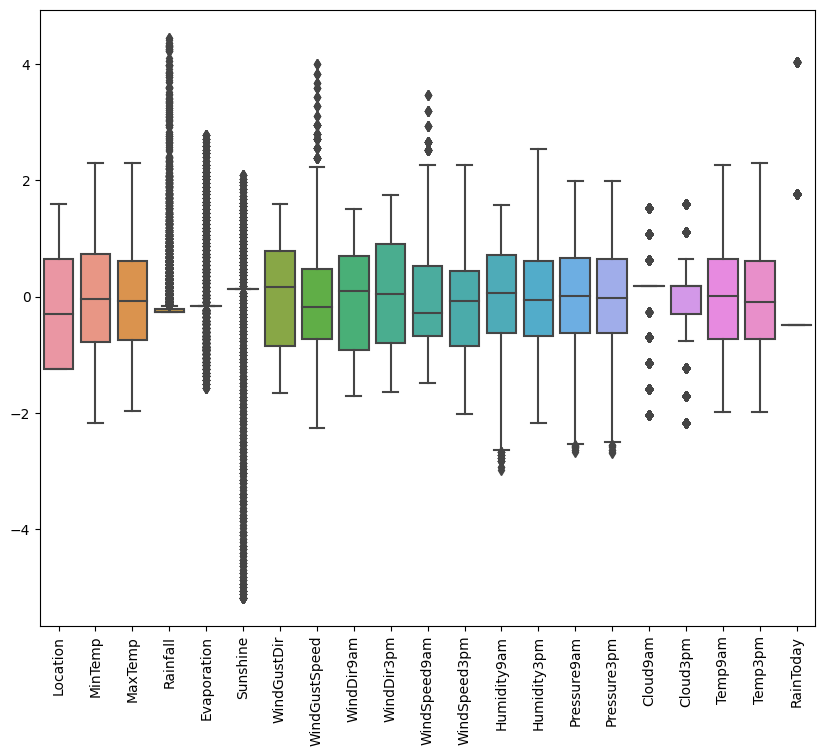

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=xtrain_sc)
plt.xticks(rotation=90)
plt.show()

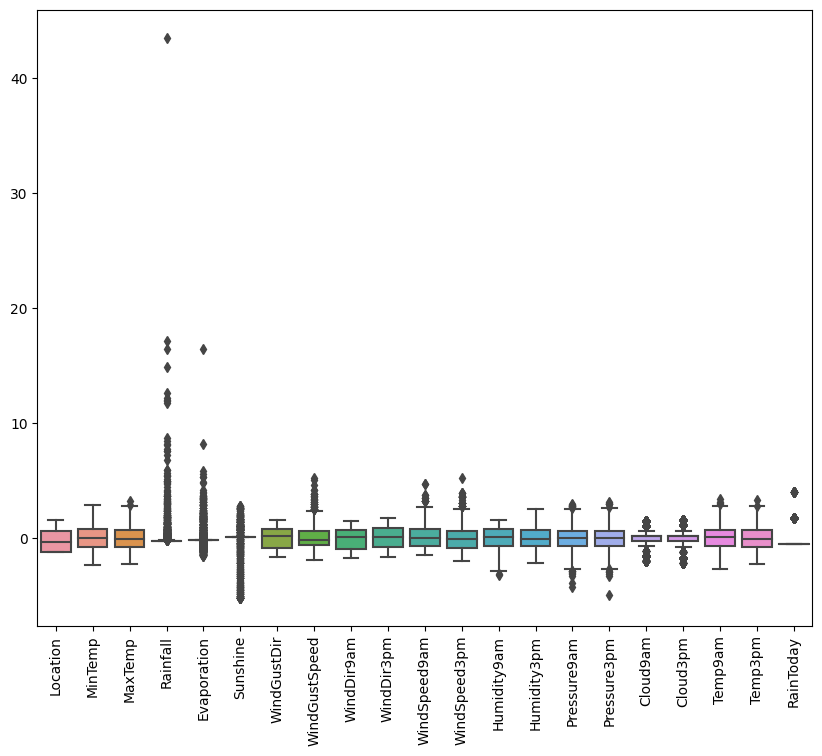

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=xtest_sc)
plt.xticks(rotation=90)
plt.show()

MODEL BUILDING

In [ ]:
early_stopping=callbacks.EarlyStopping(
    min_delta=0.001,
    verbose=1,patience=20,
    restore_best_weights=True,
)

In [ ]:
# Initialise the  NN
model=Sequential()
# layers
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu',input_dim=21))
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=16,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=8,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))


In [ ]:
# Compiling ANN
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Training ANN
history=model.fit(xtrain_sc,y_train,batch_size=32,epochs=100,verbose='auto',callbacks=[early_stopping],validation_split=0.2)

Epoch 1/100
190/190 [==============================] - 2s 4ms/step - loss: 0.5827 - accuracy: 0.7920 - val_loss: 0.5287 - val_accuracy: 0.7952
Epoch 2/100
190/190 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.7956 - val_loss: 0.5262 - val_accuracy: 0.7952
Epoch 3/100
190/190 [==============================] - 1s 3ms/step - loss: 0.5224 - accuracy: 0.7956 - val_loss: 0.5271 - val_accuracy: 0.7952
Epoch 4/100
190/190 [==============================] - 1s 4ms/step - loss: 0.5211 - accuracy: 0.7956 - val_loss: 0.5264 - val_accuracy: 0.7952
Epoch 5/100
190/190 [==============================] - 1s 4ms/step - loss: 0.5207 - accuracy: 0.7956 - val_loss: 0.5265 - val_accuracy: 0.7952
Epoch 6/100
190/190 [==============================] - 1s 4ms/step - loss: 0.5199 - accuracy: 0.7956 - val_loss: 0.5308 - val_accuracy: 0.7952
Epoch 7/100
190/190 [==============================] - 1s 3ms/step - loss: 0.5206 - accuracy: 0.7956 - val_loss: 0.5250 - val_accuracy: 0.7952

Plotting training and validation loss over epochs

In [ ]:
history_df=pd.DataFrame(history.history)
history_df

loss  accuracy  val_loss  val_accuracy
0   0.582716  0.792004  0.528678      0.795244
1   0.524135  0.795639  0.526237      0.795244
2   0.522388  0.795639  0.527122      0.795244
3   0.521096  0.795639  0.526393      0.795244
4   0.520717  0.795639  0.526522      0.795244
5   0.519884  0.795639  0.530797      0.795244
6   0.520550  0.795639  0.525024      0.795244
7   0.518451  0.795639  0.528406      0.795244
8   0.519175  0.795639  0.525546      0.795244
9   0.519166  0.795639  0.525892      0.795244
10  0.518199  0.795639  0.526440      0.795244
11  0.518655  0.795639  0.526129      0.795244
12  0.518689  0.795639  0.527710      0.795244
13  0.518174  0.795639  0.526859      0.795244
14  0.518495  0.795639  0.527071      0.795244
15  0.517185  0.795639  0.527440      0.795244
16  0.517823  0.795639  0.529056      0.795244
17  0.517837  0.795639  0.527454      0.795244
18  0.517045  0.795639  0.527579      0.795244
19  0.517270  0.795639  0.527386      0.795244
20  0.516654  0.795639  0.529429      0.795244
21  0.517376  0.795639  0.528688      0.795244
22  0.516339  0.795639  0.530942      0.795244
23  0.516380  0.795639  0.533630      0.795244
24  0.516665  0.795639  0.528259      0.795244
25  0.515609  0.795639  0.528770      0.795244
26  0.516007  0.795639  0.529111      0.795244

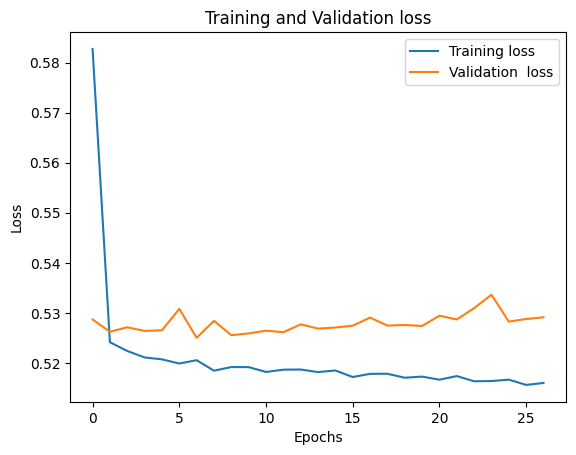

In [ ]:
plt.plot(history_df.loc[:,['loss']],label='Training loss')
plt.plot(history_df.loc[:,['val_loss']],label='Validation  loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plotting training and validation accuracy over epochs

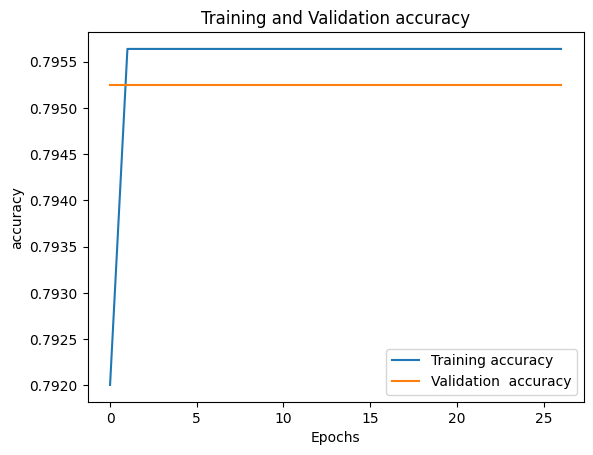

In [ ]:
plt.plot(history_df.loc[:,['accuracy']],label='Training accuracy')
plt.plot(history_df.loc[:,['val_accuracy']],label='Validation  accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Adding drop out

In [ ]:
# Initialise the  NN
model=Sequential()
# layers
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu',input_dim=21))
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=16,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=8,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))


In [ ]:
# Compiling ANN
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Training ANN
history=model.fit(xtrain_sc,y_train,batch_size=32,epochs=100,verbose='auto',callbacks=[early_stopping],validation_split=0.2)

Epoch 1/100
190/190 [==============================] - 2s 3ms/step - loss: 0.6137 - accuracy: 0.7935 - val_loss: 0.5365 - val_accuracy: 0.7952
Epoch 2/100
190/190 [==============================] - 0s 2ms/step - loss: 0.5497 - accuracy: 0.7956 - val_loss: 0.5246 - val_accuracy: 0.7952
Epoch 3/100
190/190 [==============================] - 0s 3ms/step - loss: 0.5417 - accuracy: 0.7956 - val_loss: 0.5250 - val_accuracy: 0.7952
Epoch 4/100
190/190 [==============================] - 0s 2ms/step - loss: 0.5390 - accuracy: 0.7956 - val_loss: 0.5247 - val_accuracy: 0.7952
Epoch 5/100
190/190 [==============================] - 1s 3ms/step - loss: 0.5366 - accuracy: 0.7956 - val_loss: 0.5234 - val_accuracy: 0.7952
Epoch 6/100
190/190 [==============================] - 0s 2ms/step - loss: 0.5366 - accuracy: 0.7956 - val_loss: 0.5247 - val_accuracy: 0.7952
Epoch 7/100
190/190 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.7956 - val_loss: 0.5226 - val_accuracy: 0.7952

Plotting training and validation loss over epochs

In [ ]:
history_df=pd.DataFrame(history.history)
history_df

loss  accuracy  val_loss  val_accuracy
0   0.613716  0.793491  0.536465      0.795244
1   0.549671  0.795639  0.524559      0.795244
2   0.541718  0.795639  0.525030      0.795244
3   0.539041  0.795639  0.524743      0.795244
4   0.536576  0.795639  0.523376      0.795244
5   0.536633  0.795639  0.524685      0.795244
6   0.532562  0.795639  0.522585      0.795244
7   0.530860  0.795639  0.522704      0.795244
8   0.528326  0.795639  0.522560      0.795244
9   0.530136  0.795639  0.522147      0.795244
10  0.529045  0.795639  0.522253      0.795244
11  0.528028  0.795639  0.522205      0.795244
12  0.526662  0.795639  0.522170      0.795244
13  0.525994  0.795639  0.521814      0.795244
14  0.520859  0.795639  0.522114      0.795244
15  0.525387  0.795639  0.522553      0.795244
16  0.524882  0.795639  0.522142      0.795244
17  0.523842  0.795639  0.521878      0.795244
18  0.522721  0.795639  0.522717      0.795244
19  0.521698  0.795639  0.524074      0.795244
20  0.523412  0.795639  0.522566      0.795244
21  0.522638  0.795639  0.522554      0.795244
22  0.521266  0.795639  0.523765      0.795244
23  0.520907  0.795639  0.522734      0.795244
24  0.520782  0.795639  0.523520      0.795244
25  0.522846  0.795639  0.522483      0.795244
26  0.519843  0.795639  0.523476      0.795244
27  0.521785  0.795639  0.523575      0.795244
28  0.521218  0.795639  0.522716      0.795244
29  0.521721  0.795639  0.522883      0.795244

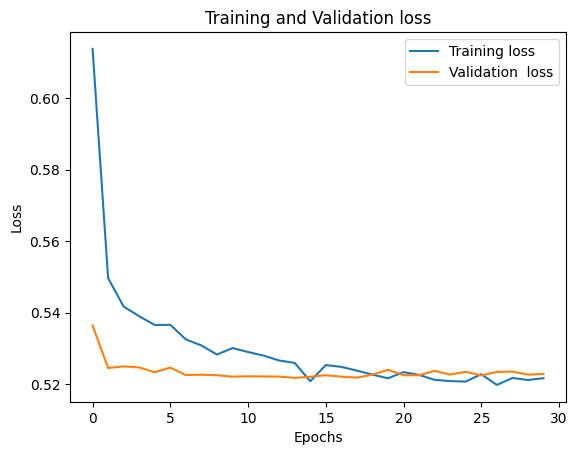

In [ ]:
plt.plot(history_df.loc[:,['loss']],label='Training loss')
plt.plot(history_df.loc[:,['val_loss']],label='Validation  loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plotting training and validation accuracy over epochs

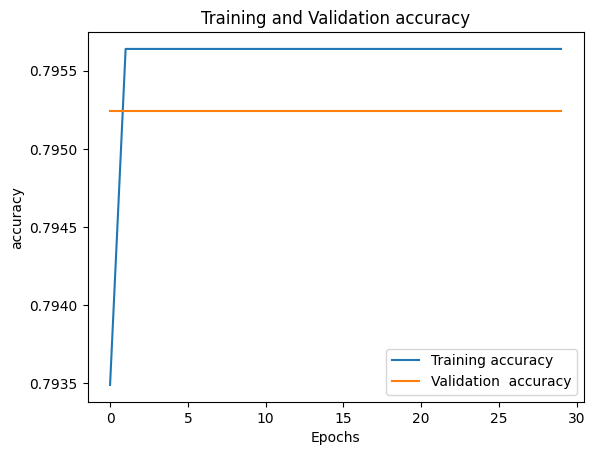

In [ ]:
plt.plot(history_df.loc[:,['accuracy']],label='Training accuracy')
plt.plot(history_df.loc[:,['val_accuracy']],label='Validation  accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(xtest_sc)
y_pred = (y_pred > 0.5)

68/68 [==============================] - 0s 1ms/step


In [ ]:
xtest_sc.shape

(2163, 21)

In [ ]:
y_test.shape

(2163,)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1684
           1       0.00      0.00      0.00       453
           2       0.00      0.00      0.00        26

    accuracy                           0.78      2163
   macro avg       0.26      0.33      0.29      2163
weighted avg       0.61      0.78      0.68      2163

